<a href="https://colab.research.google.com/github/SVS-Final-Year-Project/Resnet50-Kidney-Cyst-Classification/blob/main/ResNet50CTSCAN_(ADAM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# necessary libraries
import os
import pandas as pd

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
import os
import numpy as np
import pandas as pd
import random
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
base_dir= "D:\V\KidneyDataset"
os.listdir(base_dir)

['Cyst', 'Normal']

In [ ]:
cyst_data= r"D:\V\KidneyDataset\Cyst"
print("Cyst images :\n" ,os.listdir(cyst_data)[:5])

normal_data= r"D:\V\KidneyDataset\Normal"
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

Cyst images :
 ['Cyst- (1000).jpg', 'Cyst- (1001).jpg', 'Cyst- (1002).jpg', 'Cyst- (1003).jpg', 'Cyst- (1004).jpg']

normal images :
 ['Normal- (1323).jpg', 'Normal- (1324).jpg', 'Normal- (1325).jpg', 'Normal- (1326).jpg', 'Normal- (1327).jpg']


In [ ]:
print("no. of cyst images :" ,len(os.listdir(cyst_data)))
print("\nno. of normal images :" ,len(os.listdir(normal_data)))

no. of cyst images : 3500

no. of normal images : 3500


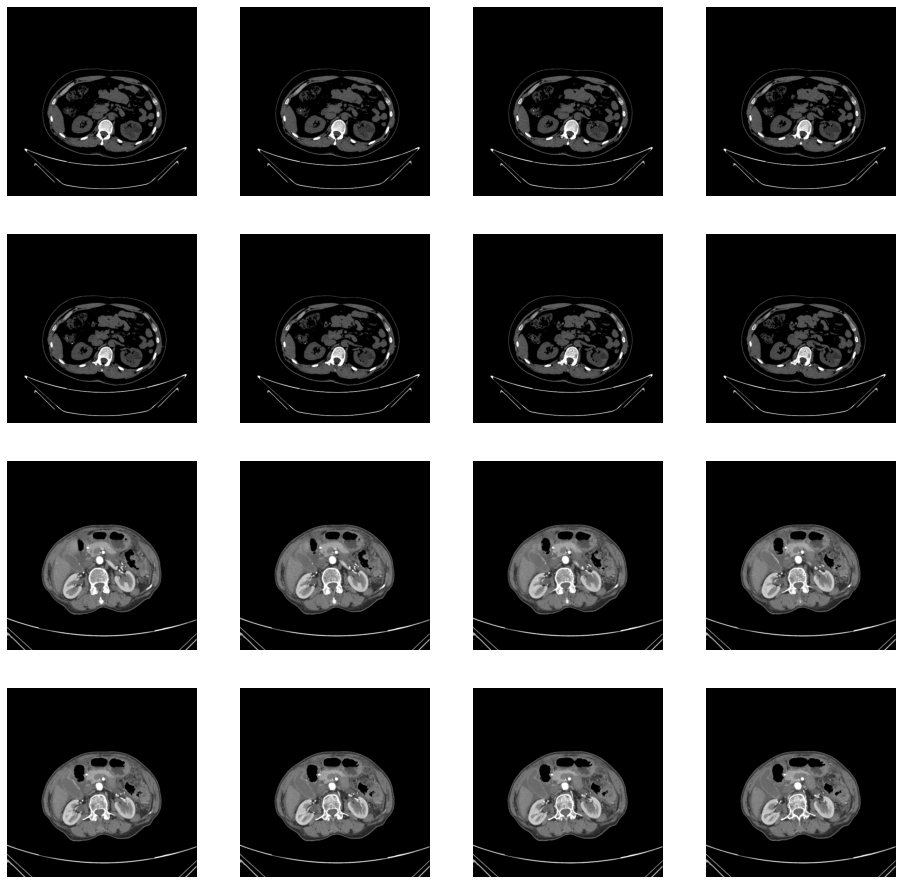

In [ ]:
nrows= 4
ncols= 4
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

cyst_img = [os.path.join(cyst_data, image) for image in os.listdir(cyst_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(cyst_img+normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

In [ ]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest', validation_split = 0.2)

train_data = train_datagen.flow_from_directory(base_dir, 
                                              target_size= (200, 200),
                                              class_mode= "categorical",
                                              batch_size=20,
                                              subset= "training"
                                              )
# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

val_data= train_datagen.flow_from_directory(base_dir, 
                                              target_size= (200, 200),
                                              class_mode= "categorical",
                                              batch_size=20,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 5600 images belonging to 2 classes.

validation data :
Found 1400 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Cyst': 0, 'Normal': 1}

In [ ]:
num_classes=2
model = Sequential()
model.add(ResNet50(input_shape=(200,200,3),include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(num_classes, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(train_data,
                   steps_per_epoch= train_data.samples//train_data.batch_size,
                   validation_data= val_data,
                   validation_steps= val_data.samples//val_data.batch_size,
                   epochs= 20,
                   verbose=1 
                  )

Epoch 1/20
280/280 [==============================] - 349s 1s/step - loss: 0.2110 - accuracy: 0.9300 - val_loss: 1.0290 - val_accuracy: 0.5007
Epoch 2/20
280/280 [==============================] - 304s 1s/step - loss: 0.1021 - accuracy: 0.9664 - val_loss: 0.9119 - val_accuracy: 0.5536
Epoch 3/20
280/280 [==============================] - 302s 1s/step - loss: 0.0856 - accuracy: 0.9709 - val_loss: 0.6578 - val_accuracy: 0.6950
Epoch 4/20
280/280 [==============================] - 300s 1s/step - loss: 0.0696 - accuracy: 0.9779 - val_loss: 1.3894 - val_accuracy: 0.5857
Epoch 5/20
280/280 [==============================] - 304s 1s/step - loss: 0.0669 - accuracy: 0.9770 - val_loss: 1.3872 - val_accuracy: 0.6029
Epoch 6/20
280/280 [==============================] - 302s 1s/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.4972 - val_accuracy: 0.7793
Epoch 7/20
280/280 [==============================] - 317s 1s/step - loss: 0.0574 - accuracy: 0.9805 - val_loss: 0.2300 - val_accuracy: 0.9064

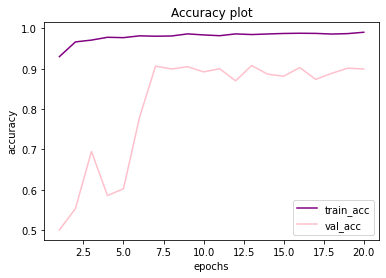

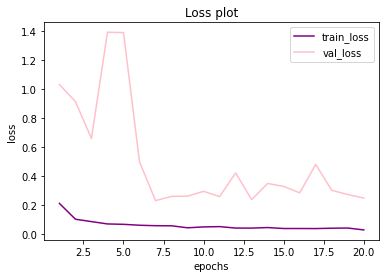

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)
prediction= (prediction > 0.5)
prediction

70/70 [==============================] - 55s 729ms/step


array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [ ]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
pred1=[i[0] for i in prediction]
pred2=[i[1] for i in prediction]

0.9085714285714286
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       700
           1       0.93      0.88      0.91       700

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



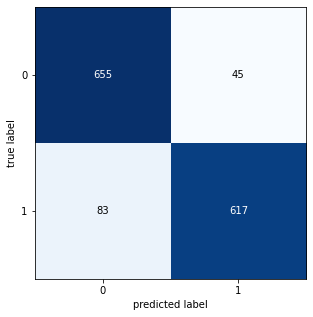

In [ ]:
cm= confusion_matrix(val_data.classes, pred2)
plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, pred2))
print(classification_report(val_data.classes, pred2))